# 1.  Formulating our objective.
**AIM** to **classify the images of X-rays** to **identify** which show signs of **pneumonia**. It is a **binary classfication**.

In [1]:
#! pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=(20,20)

# 2. Looking at our images.

**Pnuemonia X Ray Image**

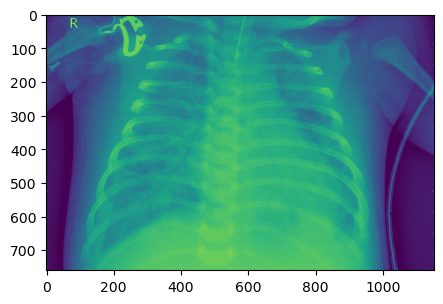

In [3]:
from glob import glob #retriving an array of files in directories
path_train = r"D:\project\data\chest_xray\train"
img = glob(path_train+"/PNEUMONIA/*.jpeg")
#print(img)
img = np.asarray(plt.imread(img[0]))
plt.figure(figsize = (5 , 5))
plt.imshow(img)

**Normal X Ray Image**

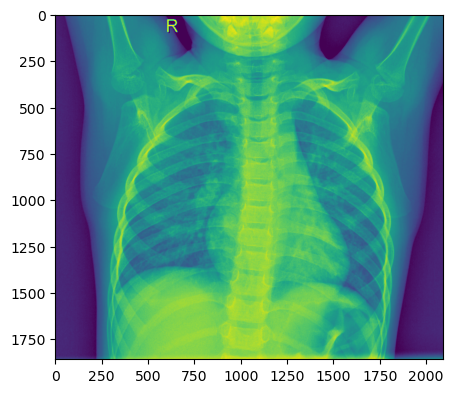

In [4]:
img = glob(path_train+"/NORMAL/*.jpeg")
img = np.asarray(plt.imread(img[0]))
plt.figure(figsize = (5 , 5))
plt.imshow(img)

# 3. Acquiring our dataset from the directories.

**Importing libraries that are used for creating a convolution neural network model.**

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array

In [6]:
from tensorflow.keras.models import Sequential,Model

In [7]:
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Input,MaxPooling2D,Dropout,BatchNormalization

**Using Image Data Generator we load the images to our model.**

In [8]:
img_size=150
batch_size=25

traingen=ImageDataGenerator(rescale=1/255.,
                           rotation_range=50,
                        brightness_range=[0.2,1.2],
                           width_shift_range=0.1,
                           height_shift_range=0.1,
                           horizontal_flip=True)


testgen=ImageDataGenerator(rescale=1/255.)

valgen=ImageDataGenerator(rescale=1/255.)

* **traindata** : stores all the images from the train directroy
* **testdata** : stores all the images from the test directory
* **valdata** : stores all the images from the val directory

In [9]:
traindata=traingen.flow_from_directory(r'D:\project\data\chest_xray\train',
                                       target_size=(img_size,img_size)
                                       ,batch_size=batch_size,
                                       shuffle=True,class_mode='binary'
                                      ,color_mode='grayscale')

testdata=testgen.flow_from_directory(r'D:\project\data\chest_xray\test',
                                    shuffle=False,batch_size=batch_size,
                                    target_size=(img_size,img_size),
                                    class_mode="binary",color_mode='grayscale')
valdata=valgen.flow_from_directory(r'D:\project\data\chest_xray\val',
                                    shuffle=False,batch_size=batch_size,
                                    target_size=(img_size,img_size),
                                    class_mode="binary",color_mode='grayscale')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


**Printing 15 images from the train data**

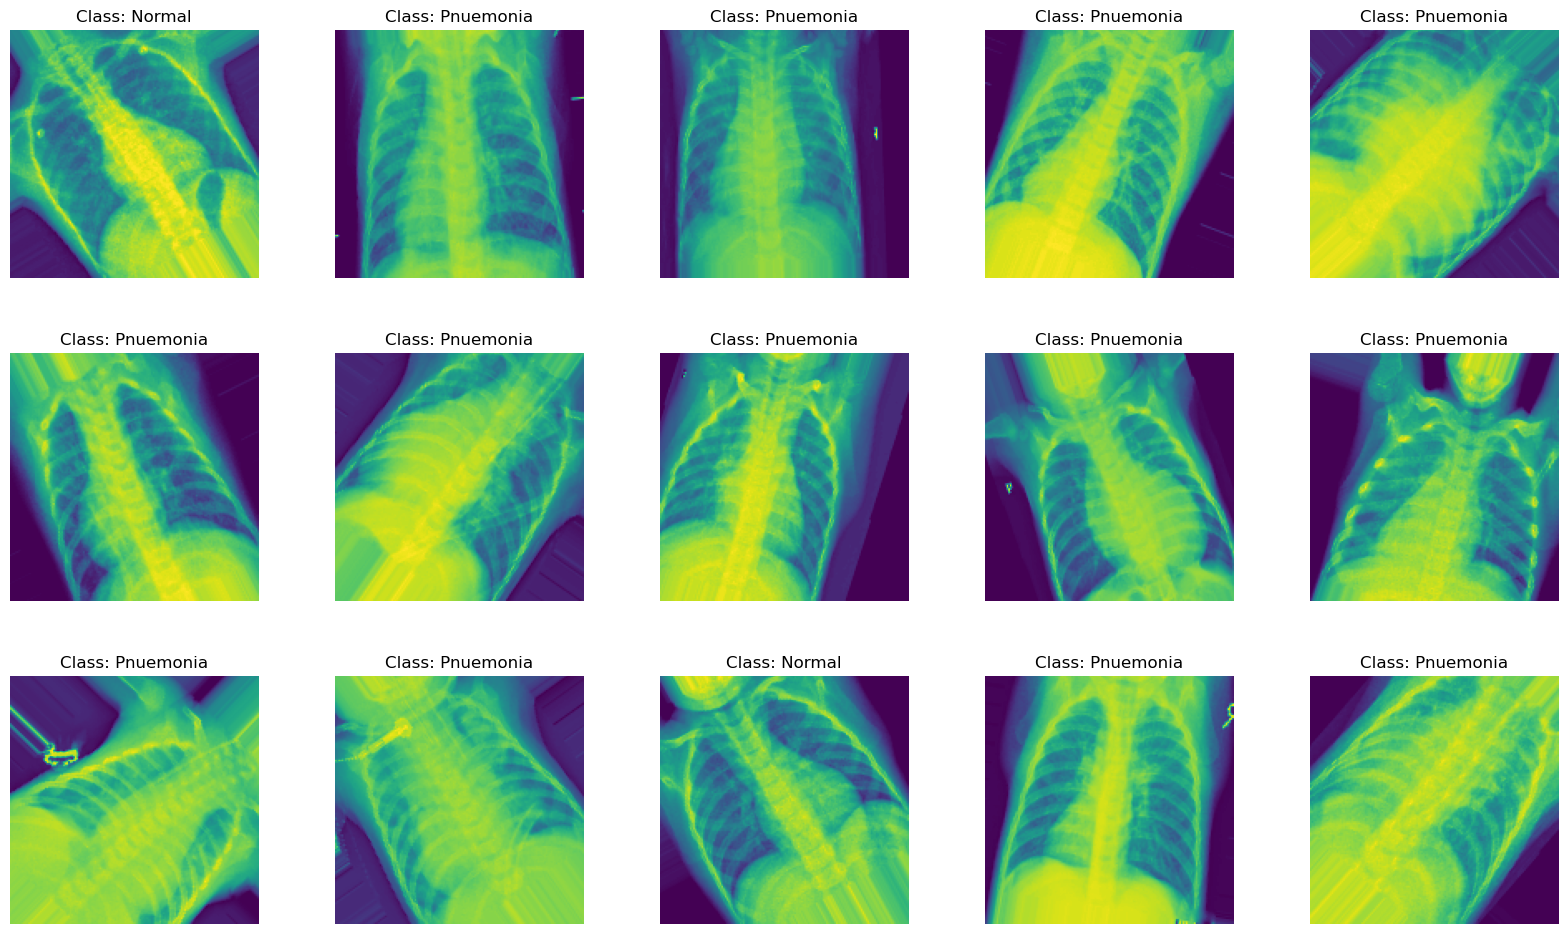

In [10]:
labels=['Normal','Pnuemonia']
samples=traindata.__next__()

images=samples[0]
target=samples[1]

for i in range(15):
    plt.subplot(5,5,i+1)
    plt.subplots_adjust(hspace=0.3,wspace=.3)
    plt.imshow(images[i])
    plt.title(f"Class: {labels[int(target[i])]}")
    plt.axis('off')

**Meta Data**

0 here is a label Normal and 1 is for Pnuemonia

In [11]:
df=pd.DataFrame(traindata.classes)
df.value_counts()

1    3875
0    1341
dtype: int64

In [12]:
df=pd.DataFrame(valdata.classes)
df.value_counts()

0    8
1    8
dtype: int64

In [13]:
df=pd.DataFrame(testdata.classes)
df.value_counts()

1    390
0    234
dtype: int64

In [14]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
model=Sequential()
model.add(Conv2D(32,(2,2),input_shape=(img_size,img_size,1),activation="relu",padding='same',strides=1))
model.add(MaxPooling2D())
model.add(Conv2D(64,(2,2),strides=2,activation="relu",padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(128,(2,2),strides=1,activation="relu",padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(1,activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 38, 38, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 19, 19, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 19, 19, 128)       32896     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 9, 9, 128)         0

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint
filepath= "model_cnn.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False)

In [18]:
history=model.fit(traindata,validation_data=valdata,epochs=15,callbacks=[checkpoint])

Epoch 1/15
209/209 [==============================] - ETA: 0s - loss: 0.5004 - accuracy: 0.7619
Epoch 1: val_loss improved from inf to 1.46192, saving model to model_cnn.h5
209/209 [==============================] - 61s 286ms/step - loss: 0.5004 - accuracy: 0.7619 - val_loss: 1.4619 - val_accuracy: 0.6250
Epoch 2/15


C:\Users\TAMIL\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


209/209 [==============================] - ETA: 0s - loss: 0.2984 - accuracy: 0.8643
Epoch 2: val_loss improved from 1.46192 to 0.80609, saving model to model_cnn.h5
209/209 [==============================] - 56s 269ms/step - loss: 0.2984 - accuracy: 0.8643 - val_loss: 0.8061 - val_accuracy: 0.8750
Epoch 3/15
209/209 [==============================] - ETA: 0s - loss: 0.2748 - accuracy: 0.8871
Epoch 3: val_loss did not improve from 0.80609
209/209 [==============================] - 56s 268ms/step - loss: 0.2748 - accuracy: 0.8871 - val_loss: 1.5274 - val_accuracy: 0.6250
Epoch 4/15
209/209 [==============================] - ETA: 0s - loss: 0.2584 - accuracy: 0.8880
Epoch 4: val_loss improved from 0.80609 to 0.64445, saving model to model_cnn.h5
209/209 [==============================] - 57s 272ms/step - loss: 0.2584 - accuracy: 0.8880 - val_loss: 0.6445 - val_accuracy: 0.8750
Epoch 5/15
209/209 [==============================] - ETA: 0s - loss: 0.2370 - accuracy: 0.8980
Epoch 5: val_los

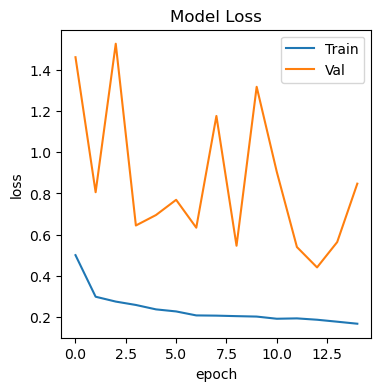

In [26]:
plt.figure(figsize=(4,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

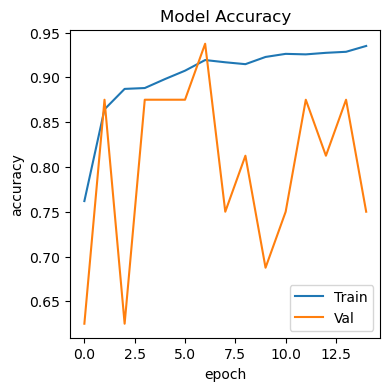

In [27]:
plt.figure(figsize=(4,4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

##Checking the model prediction for the test data

In [28]:
y_test = testdata.classes
y_pred = model.predict(testdata)
y_pred_probs = y_pred.copy()

25/25 [==============================] - 3s 128ms/step


In [29]:
y_pred[y_pred>0.5] = 1
y_pred[y_pred<0.5] = 0

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
print(classification_report(y_test,y_pred,target_names = ['Normal','Pnuemonia']))

              precision    recall  f1-score   support

      Normal       0.96      0.52      0.68       234
   Pnuemonia       0.77      0.99      0.87       390

    accuracy                           0.81       624
   macro avg       0.87      0.75      0.77       624
weighted avg       0.84      0.81      0.80       624



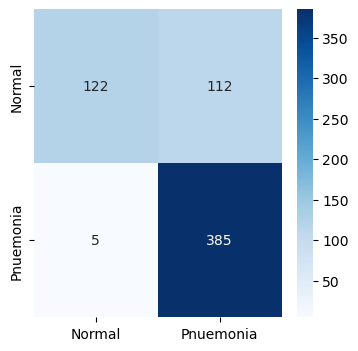

In [32]:
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.3g',xticklabels=['Normal','Pnuemonia'],
            yticklabels=['Normal','Pnuemonia'],cmap='Blues')
plt.show()